In [1]:
from Networks.iResNet import iResNet3D
from Trainers import split_data,Trainer
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import joblib
import matplotlib.colors as mcolors

In [ ]:
# 初始化模型
input_shape = (2,)  # 输入形状
full_connect_shape = (128, 32, 32, 16)  # 全连接层目标形状，根据 true_output0 的形状确定
q = 2  # BB 的数量
N = 3  # 每个 BB 中 SB 的数量

output_keys = ["T", "w"]

model = iResNet3D(input_shape, full_connect_shape, q, N, output_keys)

# 加载训练好的权重
model.load_state_dict(torch.load("model/PIRN002.pth", weights_only=True))

# 将模型设置为评估模式
model.eval()

In [ ]:
# value set
input_test = np.array([3,3])

input_test_np = input_test.astype(np.float32)

input_test_torch = torch.from_numpy(input_test_np)

# 将数据移动到 GPU（如果可用）
device = "cpu"
model = model.to(device)
input_test_torch = input_test_torch.to(device)

In [ ]:
# 进行预测
with torch.no_grad():
    out_dict = model(input_test_torch)

# # 将预测结果转换回 numpy 数组
# T_test_np = T_test.cpu().numpy().squeeze()


In [2]:
x_inter = np.linspace(0, 0.04, 32)
y_inter = np.linspace(0, 0.04, 32)
z_inter = np.linspace(0, 0.3, 16)

X, Y, Z = np.meshgrid(x_inter, y_inter, z_inter)

In [ ]:
cut = 8
c=plt.contourf(X[:,:,cut], Y[:,:,cut],out_dict['w'].squeeze(1).squeeze(0)[:,:,cut] / 1e5,cmap='jet',levels=100)
plt.colorbar(c)
plt.axis('equal')
plt.title('Gr = 30000, Ha = 300')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([0, 0.02, 0.04])
ax.set_yticks([0, 0.02, 0.04])
plt.savefig('result/Gr3e4,Ha3e2_PIRN.png')

In [ ]:
out_dict['w'].squeeze(1).squeeze(0)[:,:,cut].max()

In [4]:
label = joblib.load('preData/uni/label')
w_cfd = joblib.load('preData/uni/w_train.joblib')

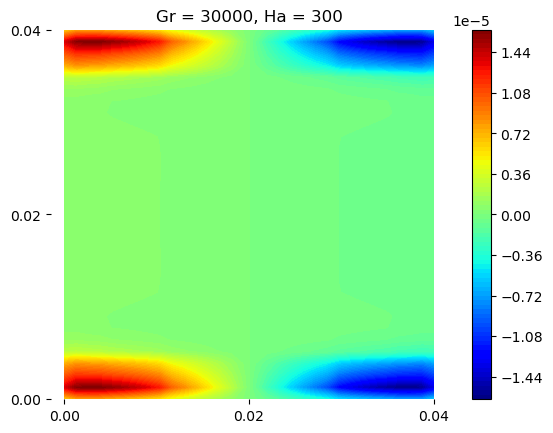

In [6]:
cut = 8


c=plt.contourf(X[:,:,cut], Y[:,:,cut],w_cfd[12][:,:,cut]/ 1e5,cmap='jet',levels=100)
plt.colorbar(c)
plt.axis('equal')
plt.title('Gr = 30000, Ha = 300')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([0, 0.02, 0.04])
ax.set_yticks([0, 0.02, 0.04])
plt.savefig('result/Gr3e4,Ha3e2_CFD.png')

In [ ]:
cut = 8
err = np.abs((w_cfd[12][:,:,cut] - (out_dict['w'].squeeze(1).squeeze(0)[:,:,cut]).numpy()) / w_cfd[12][:,:,cut].max())

# 自定义颜色条范围
vmin = 0
vmax = 0.1

# 创建一个假的图像对象来为colorbar提供颜色映射
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
cmap = plt.get_cmap('Blues')

# 创建一个空的图像对象（没有显示数据）
fig, ax = plt.subplots(figsize=(8, 6))
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='vertical')

c=plt.contourf(X[:,:,cut], Y[:,:,cut], err,cmap='Blues',levels=100, vmax=0.1)
plt.axis('equal')
plt.title('Gr = 30000, Ha = 300')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([0, 0.02, 0.04])
ax.set_yticks([0, 0.02, 0.04])
plt.savefig('result/Gr3e4,Ha3e2_err.png')

In [ ]:
err.max()